# This is a supervised machine learning problem. This type of problem is a regression problem as the output (target variable) is continuous (numeric).

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Loading the dataset
df = pd.read_csv("C:\\Users\\SRIRAM\\Desktop\\University of Essex\\Assignments\\ML Assignment\\CE802_P3_Data\\CE802_P3_Data.csv")

In [3]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,193.83,UK,49.74,14.16,213.02,343.06,1753.44,-6.03,6.28,8,-5145.92,Low,11.35,1.01,1,68.92,51.16
1,1495.47,Europe,58.02,5.88,137.80,270.48,1665.33,-0.52,9.72,14,11145.82,High,10.30,0.30,5,89.30,0.00
2,1121.31,USA,68.85,9.18,209.54,295.26,3208.65,-4.00,3.86,6,31859.00,Medium,7.98,13.05,4,-11.80,2808.51
3,-305.49,USA,49.29,8.73,171.83,266.06,1704.18,-2.41,4.16,6,8075.76,Low,16.52,2.01,5,41.40,1092.21
4,1457.07,UK,64.98,7.92,74.10,260.22,1922.34,-11.97,5.00,18,9886.72,High,5.37,0.01,1,62.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,633.87,Europe,54.51,6.51,179.23,219.02,1064.04,-3.60,2.74,8,19120.54,Low,10.29,1.22,4,29.66,0.00
1496,390.45,Rest,65.97,6.81,154.23,261.36,527.31,-6.83,23.50,8,1359.86,Low,11.58,1.01,6,-40.00,1241.64
1497,78.72,UK,78.06,3.72,144.12,313.50,851.85,-3.59,2.26,10,7519.18,Low,15.07,0.03,4,44.80,0.00
1498,2366.88,Rest,92.49,26.64,255.96,326.36,2191.02,-1.21,6.64,6,9741.86,Low,11.40,42.04,3,29.96,396.84


In [4]:
# Command that gives the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   object 
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   object 
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   int64  
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [5]:
# Checking for missing values
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [6]:
# Checking the data for having unique values
df['F2'].value_counts()

USA       407
Europe    380
Rest      360
UK        353
Name: F2, dtype: int64

In [7]:
df['F12'].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F12, dtype: int64

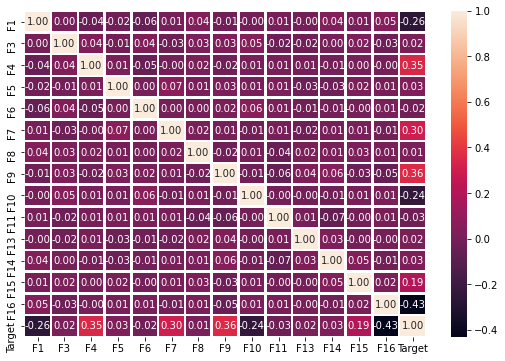

In [8]:
# Finding Correlations
corr = df.corr()

f, ax = plt.subplots(figsize = (9, 6))
sns.heatmap(corr, annot = True, linewidths = 1.5, fmt = '.2f', ax= ax)
plt.show()

# Usually, the problem of multicollinearity affects the performance of the model. So it is a good practice to check the corelations between the variables. There are possibilities that the model may not understand that which variable has more impact over the data. So, in order to avoid the multicollinearity problem, correlation heatmap is generated to find the correlations between the variables.

This data does not gets affected by the multicollinearity problem which can be clearly understood from the heatmap.

In [9]:
# Encoding the categorical variables using Label Encoder technique 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['F12'] = encoder.fit_transform(df['F12'])
df['F2'] = encoder.fit_transform(df['F2'])

In [10]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,193.83,2,49.74,14.16,213.02,343.06,1753.44,-6.03,6.28,8,-5145.92,1,11.35,1.01,1,68.92,51.16
1,1495.47,0,58.02,5.88,137.80,270.48,1665.33,-0.52,9.72,14,11145.82,0,10.30,0.30,5,89.30,0.00
2,1121.31,3,68.85,9.18,209.54,295.26,3208.65,-4.00,3.86,6,31859.00,2,7.98,13.05,4,-11.80,2808.51
3,-305.49,3,49.29,8.73,171.83,266.06,1704.18,-2.41,4.16,6,8075.76,1,16.52,2.01,5,41.40,1092.21
4,1457.07,2,64.98,7.92,74.10,260.22,1922.34,-11.97,5.00,18,9886.72,0,5.37,0.01,1,62.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,633.87,0,54.51,6.51,179.23,219.02,1064.04,-3.60,2.74,8,19120.54,1,10.29,1.22,4,29.66,0.00
1496,390.45,1,65.97,6.81,154.23,261.36,527.31,-6.83,23.50,8,1359.86,1,11.58,1.01,6,-40.00,1241.64
1497,78.72,2,78.06,3.72,144.12,313.50,851.85,-3.59,2.26,10,7519.18,1,15.07,0.03,4,44.80,0.00
1498,2366.88,1,92.49,26.64,255.96,326.36,2191.02,-1.21,6.64,6,9741.86,1,11.40,42.04,3,29.96,396.84


In [11]:
df['F2'].value_counts()

3    407
0    380
1    360
2    353
Name: F2, dtype: int64

In [12]:
df['F12'].value_counts()

4    312
1    310
0    301
3    290
2    287
Name: F12, dtype: int64

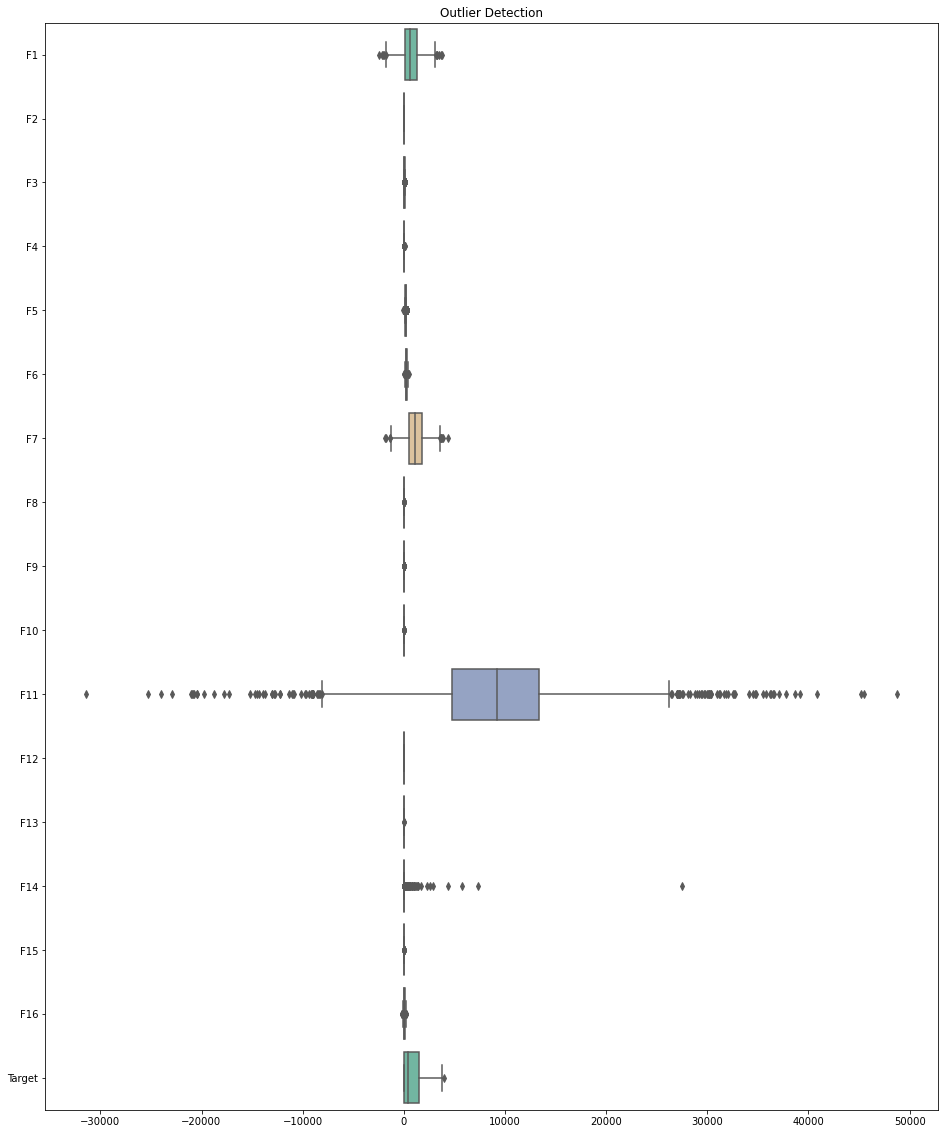

In [13]:
# Checking the presence of outliers 
f, ax = plt.subplots(figsize = (16, 20))
ax = sns.boxplot(data = df, orient = "h", palette = "Set2",)
ax.set_title("Outlier Detection")
plt.show()

# The outliers affect the performance of the model. Here, the outliers are removed using Z-Score method.

In [14]:
# Importing the required library to view the outliers using Z-Score method
from scipy import stats

z = np.abs(stats.zscore(df))
print(z)

threshold=3

print(np.where(z>3))

[[0.52521722 0.41709952 0.90552261 ... 1.60522276 0.71495138 0.7975717 ]
 [0.91471283 1.33787742 0.24551141 ... 0.57331978 1.06276807 0.8444229 ]
 [0.50080098 1.29458799 0.61776411 ... 0.02868414 0.66266214 1.72754877]
 ...
 [0.65255684 0.41709952 1.351907   ... 0.02868414 0.30330571 0.8444229 ]
 [1.87870398 0.46038895 2.50214391 ... 0.51595149 0.05003782 0.48100556]
 [0.28852548 0.46038895 1.03385812 ... 1.11795541 1.62118623 0.24192791]]
(array([  11,   16,   21,   30,   34,   37,   39,  109,  112,  113,  113,
        117,  123,  125,  126,  135,  147,  158,  162,  166,  173,  197,
        199,  205,  215,  248,  255,  262,  263,  266,  268,  270,  273,
        293,  308,  314,  314,  320,  335,  351,  360,  376,  385,  403,
        413,  419,  426,  440,  443,  474,  480,  488,  499,  513,  518,
        524,  538,  547,  548,  556,  568,  599,  611,  614,  619,  622,
        645,  650,  650,  657,  680,  692,  732,  735,  745,  747,  797,
        804,  818,  822,  822,  835,  847,  

In [15]:
new_df = df[(z < 3).all(axis=1)]

In [16]:
new_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,193.83,2,49.74,14.16,213.02,343.06,1753.44,-6.03,6.28,8,-5145.92,1,11.35,1.01,1,68.92,51.16
1,1495.47,0,58.02,5.88,137.80,270.48,1665.33,-0.52,9.72,14,11145.82,0,10.30,0.30,5,89.30,0.00
2,1121.31,3,68.85,9.18,209.54,295.26,3208.65,-4.00,3.86,6,31859.00,2,7.98,13.05,4,-11.80,2808.51
3,-305.49,3,49.29,8.73,171.83,266.06,1704.18,-2.41,4.16,6,8075.76,1,16.52,2.01,5,41.40,1092.21
4,1457.07,2,64.98,7.92,74.10,260.22,1922.34,-11.97,5.00,18,9886.72,0,5.37,0.01,1,62.74,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,633.87,0,54.51,6.51,179.23,219.02,1064.04,-3.60,2.74,8,19120.54,1,10.29,1.22,4,29.66,0.00
1496,390.45,1,65.97,6.81,154.23,261.36,527.31,-6.83,23.50,8,1359.86,1,11.58,1.01,6,-40.00,1241.64
1497,78.72,2,78.06,3.72,144.12,313.50,851.85,-3.59,2.26,10,7519.18,1,15.07,0.03,4,44.80,0.00
1498,2366.88,1,92.49,26.64,255.96,326.36,2191.02,-1.21,6.64,6,9741.86,1,11.40,42.04,3,29.96,396.84


In [17]:
# Defining the dependent and Independent variables
X = new_df.iloc[:, 0:16].values
y = new_df.iloc[:, 16].values

In [18]:
X

array([[ 1.93830e+02,  2.00000e+00,  4.97400e+01, ...,  1.01000e+00,
         1.00000e+00,  6.89200e+01],
       [ 1.49547e+03,  0.00000e+00,  5.80200e+01, ...,  3.00000e-01,
         5.00000e+00,  8.93000e+01],
       [ 1.12131e+03,  3.00000e+00,  6.88500e+01, ...,  1.30500e+01,
         4.00000e+00, -1.18000e+01],
       ...,
       [ 7.87200e+01,  2.00000e+00,  7.80600e+01, ...,  3.00000e-02,
         4.00000e+00,  4.48000e+01],
       [ 2.36688e+03,  1.00000e+00,  9.24900e+01, ...,  4.20400e+01,
         3.00000e+00,  2.99600e+01],
       [ 4.07790e+02,  1.00000e+00,  7.40700e+01, ...,  1.60000e-01,
         6.00000e+00,  1.22020e+02]])

In [19]:
y

array([  51.16,    0.  , 2808.51, ...,    0.  ,  396.84, 1186.26])

In [20]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1028, 16)
Shape of X_test: (343, 16)
Shape of y_train: (1028,)
Shape of y_test: (343,)


In [22]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Modeling
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred_regressor = regressor.predict(X_test)

In [24]:
#Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', gamma = 'auto')
svr.fit(X_train, y_train)

pred_svr = svr.predict(X_test)

In [25]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 25, min_samples_leaf = 10, n_jobs = -1, random_state = 0 )
rfr.fit(X_train, y_train)

pred_rfr = rfr.predict(X_test)

In [26]:
# Model Evaluation Metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [27]:
# For Linear Regression

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_regressor))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_regressor))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_regressor)))

# Calculating the r2 score
r2 = r2_score(y_test, pred_regressor)
print("r2 score :", r2)

Mean Absolute Error: 488.33949014728375
Mean Squared Error: 354308.03486762155
Root Mean Squared Error: 595.237796907775
r2 score : 0.6871255689749716


In [28]:
# For Support Vector Regression

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_svr)))

# Calculating the r2 score
r2 = r2_score(y_test, pred_svr)
print("r2 score :", r2)

Mean Absolute Error: 814.5414747270753
Mean Squared Error: 1380721.2141604924
Root Mean Squared Error: 1175.0409414826754
r2 score : -0.21925647112703417


In [29]:
# For Random Forest Regression

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

# Calculating the r2 score
r2 = r2_score(y_test, pred_rfr)
print("r2 score :", r2)

Mean Absolute Error: 468.204408496502
Mean Squared Error: 412198.65372417064
Root Mean Squared Error: 642.0269883144872
r2 score : 0.6360048134346779


In [30]:
# Regualarization tecchnique
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.0001, max_iter = 10e5)
lasso.fit(X_train, y_train)

pred_lasso = lasso.predict(X_test)

In [31]:
# For Lasso Regression

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))

# Calculating the r2 score
r2 = r2_score(y_test, pred_lasso)
print("r2 score :", r2)

Mean Absolute Error: 488.3392712681559
Mean Squared Error: 354307.9817526601
Root Mean Squared Error: 595.2377522911834
r2 score : 0.6871256158785461


In [53]:
# Cross Validation and Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_parametres = [{'n_features_to_select': list(range(1, 14))}]


rfe = RFE(regressor)
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_parametres, scoring = 'r2',
                        cv = folds, verbose = 1, return_train_score = True)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
pred_model_cv = model_cv.predict(X_test)

In [63]:
# For CV Regression

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_model_cv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_model_cv))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_model_cv)))

# Calculating the r2 score
r2 = r2_score(y_test, pred_model_cv)
print("r2 score :", r2)

Mean Absolute Error: 489.24809762714966
Mean Squared Error: 354696.47348030825
Root Mean Squared Error: 595.5639961249406
r2 score : 0.6867825552751048


In [54]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019014,0.001187,0.000597,0.000487,1,{'n_features_to_select': 1},0.194484,0.153858,0.236172,0.096326,...,0.182713,0.052523,13,0.185788,0.195744,0.173642,0.208624,0.177776,0.188315,0.012652
1,0.017745,0.000398,0.000399,0.000489,2,{'n_features_to_select': 2},0.283947,0.247773,0.327157,0.204165,...,0.278487,0.047868,12,0.282011,0.290770,0.269641,0.300241,0.271898,0.282912,0.011492
2,0.017461,0.000865,0.000391,0.000479,3,{'n_features_to_select': 3},0.375830,0.369575,0.437972,0.349518,...,0.390134,0.032648,11,0.398678,0.399328,0.380829,0.403985,0.388197,0.394203,0.008449
3,0.015280,0.000421,0.000594,0.000485,4,{'n_features_to_select': 4},0.451897,0.487989,0.513388,0.508795,...,0.485721,0.023728,10,0.501324,0.491305,0.483786,0.485907,0.495386,0.491542,0.006363
4,0.014585,0.000294,0.000991,0.000008,5,{'n_features_to_select': 5},0.506460,0.541466,0.558266,0.553067,...,0.534367,0.021095,9,0.548600,0.539347,0.534215,0.536524,0.545605,0.540858,0.005434
5,0.013540,0.000377,0.000803,0.000402,6,{'n_features_to_select': 6},0.579939,0.580559,0.642042,0.611485,...,0.594261,0.029463,8,0.606506,0.606708,0.589911,0.599400,0.611505,0.602806,0.007516
6,0.012724,0.000332,0.000199,0.000399,7,{'n_features_to_select': 7},0.640693,0.622055,0.689604,0.649908,...,0.642084,0.027832,7,0.651270,0.656250,0.638296,0.650020,0.658439,0.650855,0.007003
7,0.012455,0.000430,0.000592,0.000484,8,{'n_features_to_select': 8},0.670769,0.619506,0.707946,0.686872,...,0.662960,0.033616,6,0.677500,0.656565,0.667938,0.674812,0.686849,0.672733,0.010106
8,0.010947,0.000660,0.000403,0.000494,9,{'n_features_to_select': 9},0.668929,0.645625,0.707032,0.683358,...,0.664959,0.030109,5,0.677950,0.683954,0.674859,0.675720,0.695079,0.681512,0.007490
9,0.009586,0.000517,0.000793,0.000397,10,{'n_features_to_select': 10},0.678246,0.649487,0.705605,0.698323,...,0.670375,0.031738,1,0.682046,0.689555,0.675179,0.678243,0.695108,0.684026,0.007335


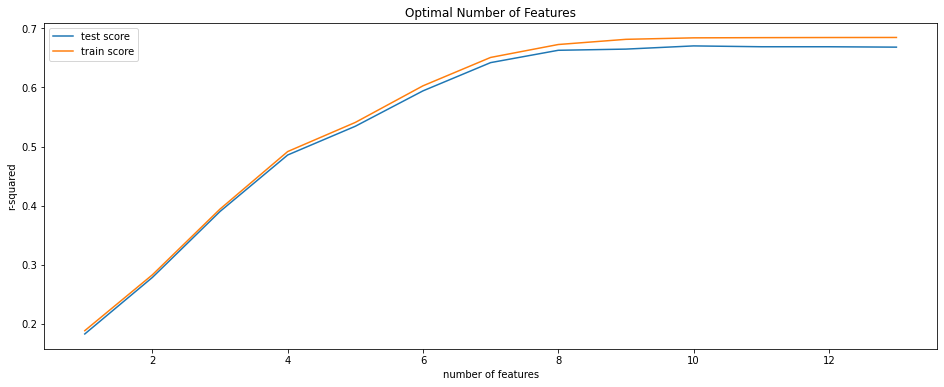

In [55]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [61]:
# Model Evaluation Metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

pred_lm = lm.predict(X_test)
# Calculating the r2 score
r2 = r2_score(y_test, pred_lm)
print("r2 score :", r2)

r2 score : 0.6871255689749716


In [69]:
# Prediction comparison
models = ["Linear Regression", "Support Vector Machine Regressor", "Random Forest Regressor"]

maes = [metrics.mean_absolute_error(y_test, pred_regressor), metrics.mean_absolute_error(y_test, pred_svr),
        metrics.mean_absolute_error(y_test, pred_rfr)]



AttributeError: module 'seaborn' has no attribute 'plt'

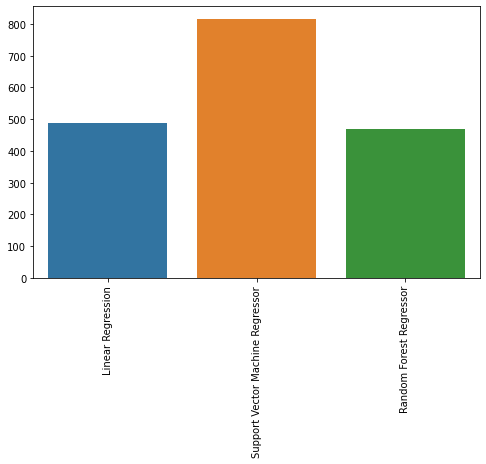

In [70]:
plt.subplots(figsize=(8,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=models, y=maes)
sns.plt.ylim(14e3, 18e3)
plt.xlabel('Model', size=15)
plt.ylabel('MAE', size=15)

In [64]:
# Saving the model
import pickle

#Saving Linear Regression model
filename = 'cv_linear_regression.sav'
pickle.dump(model_cv, open(filename, 'wb'))